In [11]:
from urllib.parse import unquote
import csv
import folium
import openrouteservice
from branca.element import Figure
from openrouteservice import convert
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

waketa_list = []
datalist = []

with open('url.txt') as f:
    for line in f:
        waketa_list.append(line.split("/"))

for i in range(len(waketa_list)):
    chimei = unquote(waketa_list[i][5])
    zahyo_matomari = waketa_list[i][6].split(",")
    keido = zahyo_matomari[0][1:]
    ido = zahyo_matomari[1]
    datalist.append([chimei,keido,ido])
    
df_list = pd.DataFrame(datalist, columns=["地名","緯度","経度"])
df_list.to_csv("loc_pos.csv", index=False, encoding="utf_8")

In [17]:
key = "5b3ce3597851110001cf624804ffaeec7cd246038d01eb4d3a32f633"
client = openrouteservice.Client(key=key)

datalist = []

with open("loc_pos.csv", encoding="utf_8") as f:
    reader = csv.reader(f)
    line = [row for row in reader]

for i in range(len(line)-2):
    p1 = float(line[i+1][1]), float(line[i+1][2])
    for j in range(i,len(line)-2):
        p2 = float(line[j+2][1]), float(line[j+2][2])
        print(p1,p2)
        p1r = tuple(reversed(p1))
        p2r = tuple(reversed(p2))
        mean_lat = (p1[0] + p2[0]) / 2
        mean_long = (p1[1] + p2[1]) / 2

        # 経路計算 (Directions V2)
        routedict = client.directions((p1r, p2r),profile="foot-walking")
        
        
        geom = routedict["routes"][0]["geometry"]
        decoded = convert.decode_polyline(geom)

        print(routedict["routes"][0]["summary"]["duration"])
        datalist.append([i,j+1,float(routedict["routes"][0]["summary"]["duration"])])
    
df_list = pd.DataFrame(datalist, columns=["出発地点","行先","移動時間[s]"])
df_list.to_csv("loc_loc_time.csv", index=False, encoding="utf_8")

(35.6311616, 139.7844807) (35.6305754, 139.7903577)
495.3
(35.6311616, 139.7844807) (35.649125, 139.787199)
2037.0
(35.6311616, 139.7844807) (35.6159392, 139.7611697)
2342.0
(35.6305754, 139.7903577) (35.649125, 139.787199)
2022.4
(35.6305754, 139.7903577) (35.6159392, 139.7611697)
2557.9
(35.649125, 139.787199) (35.6159392, 139.7611697)
3792.7


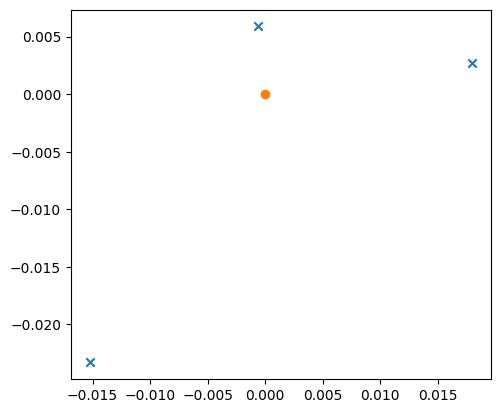

In [18]:
places_data = pd.read_csv("loc_pos.csv")
num_places = len(places_data)
num_days = 4

with open("loc_loc_time.csv", encoding="utf_8") as f:
    reader = csv.reader(f)
    loc_loc_time = [row for row in reader]

K = range(num_places)
o_ = [float(places_data.iloc[0,1]) , float(places_data.iloc[0,2])] 
o = [o_[0] -o_[0] , o_[1] - o_[1]]
K_minus_o = K[1:]
_K = [o]
for i in range(1,num_places):
    _K.append([float(places_data.iloc[i,1]) -o_[0], float(places_data.iloc[i,2])- o_[1]])
_K  = np.array(_K)
t = [[0 for i in range(num_places)] for j in range(num_places)]
for i in range(num_places):
    t[int(loc_loc_time[i+1][0])][int(loc_loc_time[i+1][1])] = float(loc_loc_time[i+1][2])
    t[int(loc_loc_time[i+1][1])][int(loc_loc_time[i+1][0])] = float(loc_loc_time[i+1][2])
t = np.array(t)

a = plt.subplot()
a.scatter(_K[1:,0],_K[1:,1],marker="x")
a.scatter(_K[0,0],_K[0,1],marker="o")
a.set_aspect("equal")
plt.show()